In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, subprocess
%load_ext watermark

In [2]:
%watermark

2019-10-15T14:26:50+02:00

CPython 3.6.9
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-31-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [17]:
#parameters
#workingdir = r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/hsbm/random_genes"
workingdir=r"/home/fvalle/phd/results/gtex/all_samples"
execdir = r"/home/fvalle/phd/master_thesis/"
#dockerurl = "cloudadm@193.144.35.220:/home/cloudadm/master_thesis/hsbm"
dockerurl = "filippo.valle@occam.c3s.unito.it:/archive/home/filippo.valle/hsbm-occam/gtexallsamples"

In [4]:
os.chdir(workingdir)

# Get the data
[Table_creation](Table_creation.ipynb) and [GTex_table_creation](GTex_table_creation) do this for you

# Get annotations

In [5]:
df_file = pd.read_csv("files.dat", index_col=0, header=0)
df_file.groupby(by='primary_site').count()

,secondary_site
primary_site,
Adipose Tissue,797
Adrenal Gland,190
Bladder,11
Blood,537
Blood Vessel,913
Brain,1671
Breast,290
Cervix Uteri,11
Colon,507


In [6]:
df_file[df_file['primary_site']=='Uterus']

,primary_site,secondary_site
_c0,,
GTEX-1117F-2426-SM-5EGGH,Uterus,Uterus
GTEX-113JC-2226-SM-5EGJG,Uterus,Uterus
GTEX-11DXX-1526-SM-5H115,Uterus,Uterus
GTEX-11EM3-1926-SM-5987U,Uterus,Uterus
GTEX-11EMC-1826-SM-5A5JT,Uterus,Uterus
...,...,...
GTEX-ZTPG-2026-SM-5O999,Uterus,Uterus
GTEX-ZV6S-1526-SM-5NQ7O,Uterus,Uterus
GTEX-ZVT2-0426-SM-5E44S,Uterus,Uterus


In [7]:
pc=pd.read_csv("%s/genes.txt"%execdir, index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

,lenght,type_of_gene,exons
ENSG00000167578,18722.0,protein-coding,18696.0
ENSG00000078237,46830.0,protein-coding,38812.0
ENSG00000146083,11328.0,protein-coding,10691.0
ENSG00000158486,226330.0,protein-coding,217697.0
ENSG00000198242,4966.0,protein-coding,4375.0


# Run statistics
```python
import tacos
tacos.statistics()
tacos.shuffleLabels()
```

CHECK **BioParameters.h** before compiling

In [8]:
os.chdir(workingdir)
os.system("cp %s/addo.py ."%execdir)
os.system("cp %s/tacos/master/data_mining ."%execdir)
os.system("chmod +x data_mining")
os.system("mv mainTable_all.csv mainTable.csv")
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")

0

In [9]:
os.system("./data_mining 8")#shuffle files

0

# Analyse table and select genes

[Table_Analyser.ipynb](Table_Analyzer.ipynb)

In [10]:
os.chdir(execdir)
from tableanalyser import scalinglawsandoverexpressed

<class 'pandas.core.frame.DataFrame'>
Index: 18913 entries, ENSG00000186092 to ENSG00000198727
Columns: 11688 entries, GTEX-1117F-0226-SM-5GZZ7 to GTEX-ZXG5-0005-SM-57WCN
dtypes: float64(9), int64(11679)
memory usage: 1.6+ GB
None
genes:18913	realizations:11688
<class 'pandas.core.frame.DataFrame'>
Index: 18913 entries, ENSG00000186092 to ENSG00000198727
Data columns (total 4 columns):
mean            18913 non-null float64
variance        18913 non-null float64
type_of_gene    18913 non-null object
occurrence      18913 non-null float64
dtypes: float64(3), object(1)
memory usage: 738.8+ KB
None


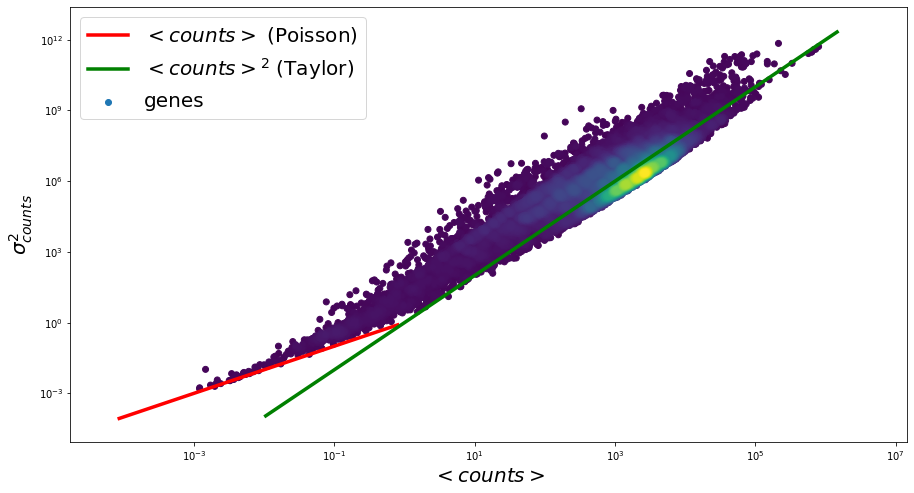

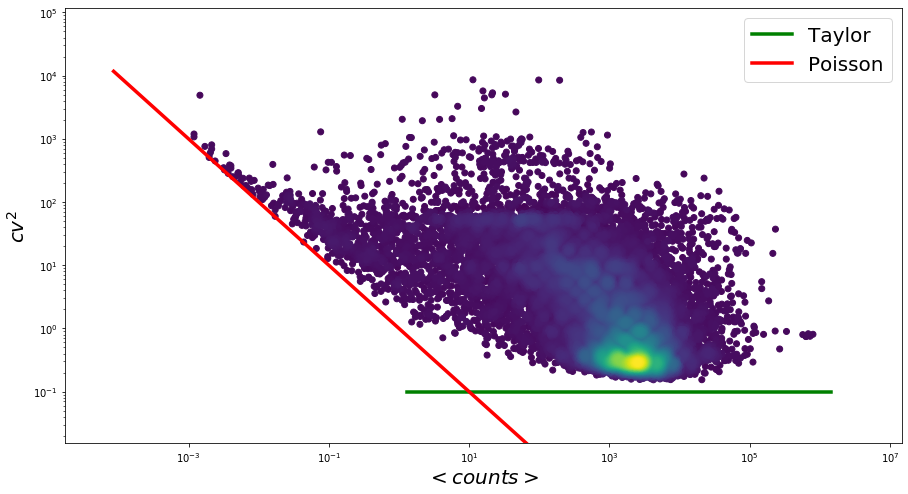

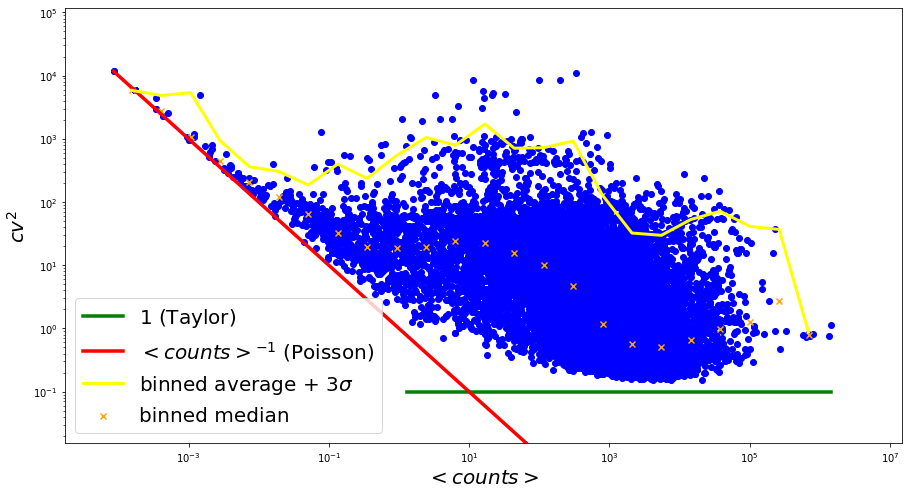

found 1210 highly variable genes


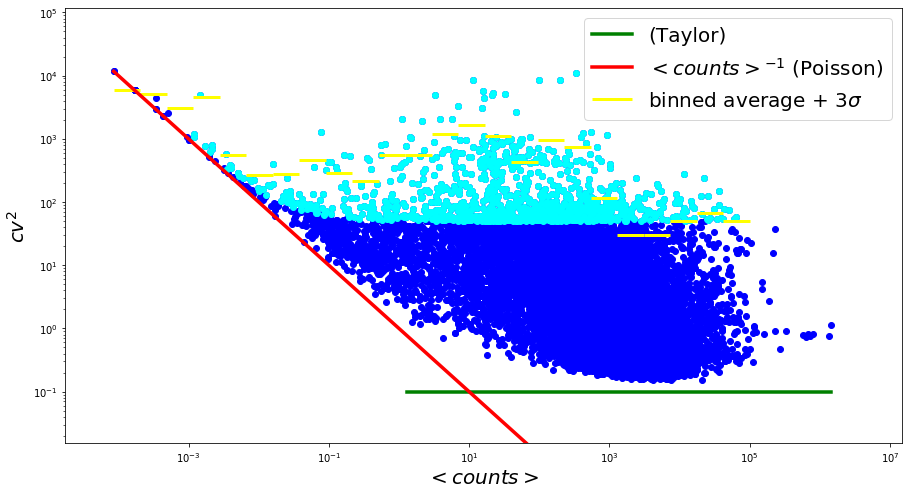

In [11]:
scalinglawsandoverexpressed(workingdir, distance=50)

In [12]:
os.chdir(workingdir)
os.system("mv mainTable.csv mainTable_all.csv")
os.system("mv mainTable_over.csv mainTable.csv")

0

# Make bipartite network
```bash
python addo.py
```
```python
import tacos
tacos.makegraph()
```

In [15]:
os.chdir(workingdir)
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")
os.system("./data_mining 7")

0

In [18]:
os.system('bash -c "scp graph.xml.gz %s/."'%dockerurl)

0

[hSBM.ipynb]()

# Run stochastic block model
```
docker run -it -d -v $PWD:/home/filippo fvalle01/hsbm
```

download the data

In [ ]:
os.chdir(workingdir)
os.system("mkdir -p topsbm")
os.system('bash -c "scp %s/* topsbm/."'%dockerurl)

# Run cluster analysis

In [ ]:
os.chdir(execdir)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
#geneontology

In [ ]:
os.chdir(execdir)
import hsbmpy, importlib
importlib.reload(hsbmpy)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
os.chdir(workingdir)

In [ ]:
labels = df_file.columns
clusteranalysis(workingdir, labels, l=4)

In [ ]:
scores = get_scores(workingdir,labels, l=3, verbose=False)
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=[k for k in scores.keys()],xl=getclustersizesarray(workingdir,l=3))
plt.show()
fig.savefig("%s/metric.pdf"%(workingdir))

In [ ]:
geneontology.topicanalysis()

# Clean

In [ ]:
os.chdir(workingdir)
os.system("rm -rf data_mining addo.py")